# Part I: Data Observation

## Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

sns.set_style('whitegrid')
colormap = sns.color_palette("Blues", as_cmap=True)

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

The units of the columns are the following:

- Temperature: °$C$
- Humidity(Relative): $\%$
- Ozone: $K\Omega$ 
- Target(Ozone): $\mu gr/m^3$

In [2]:
df = pd.read_csv('data.csv', sep=';')

In [3]:
df.head()

,date,RefSt,Sensor_O3,Temp,RelHum
0,21/06/2017 7:00,15.0,36.3637,21.77,53.97
1,21/06/2017 7:30,15.0,34.8593,25.50,42.43
2,21/06/2017 8:00,19.0,37.3510,27.97,34.93
3,21/06/2017 8:30,26.0,43.6993,29.41,32.07
4,21/06/2017 9:00,34.0,53.9600,30.20,30.83


In [4]:
print(f'Columns: {df.shape[1]}\nRows: {df.shape[0]}')
print('Columns types:')
print(df.dtypes)

Columns: 5
Rows: 1000
Columns types:
date          object
RefSt        float64
Sensor_O3    float64
Temp         float64
RelHum       float64
dtype: object


Fix date type and sort by date:

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df['date'][:5]

0   2017-01-07 00:00:00
1   2017-01-07 00:30:00
2   2017-01-07 01:00:00
3   2017-01-07 01:30:00
4   2017-01-07 02:00:00
Name: date, dtype: datetime64[ns]

Fix columns' name and order:

In [6]:
new_columns = {
    'date': 'date',
    'RefSt': 'target',
    'Sensor_O3': 'ozone',
    'Temp': 'temperature',
    'RelHum': 'humidity'
}
df.rename(columns=new_columns, inplace=True)
new_order = ['date', 'temperature', 'humidity', 'ozone', 'target']
df = df.reindex(columns=new_order)
df.columns

Index(['date', 'temperature', 'humidity', 'ozone', 'target'], dtype='object')

In [7]:
df.describe().loc[['mean','std']]

,temperature,humidity,ozone,target
mean,24.966410,42.018640,234.839993,64.477000
std,6.443502,14.877965,172.064966,41.950129


## Exercise 1

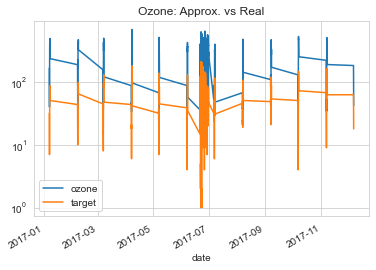

In [8]:
axs= df.plot(
    x='date', 
    y=['ozone', 'target'],
    kind='line', 
    logy=True,
    title='Ozone: Approx. vs Real',
)

## Exercise 2

In [9]:
from sklearn.preprocessing import StandardScaler

def standarize(df, columns):
    scaler = StandardScaler()
    r = df.copy()
    r[columns] = scaler.fit_transform(df[columns])
    return r

def scatter_plot(df, x, y, label, color, ax=None):
    ax = df.plot(
        x=x, 
        y=y,
        kind='scatter',
        title='Ozone: Approx. vs Real',
        color=color,
        xlabel='Approx. $O_3$',
        ylabel='True $O_3$',
        ax=ax,
        s=5,
    )
    return ax

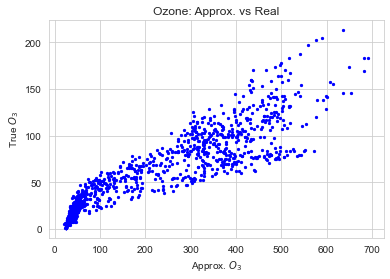

In [10]:
_ = scatter_plot(df, x='ozone', y='target', label='Regular', color='blue')

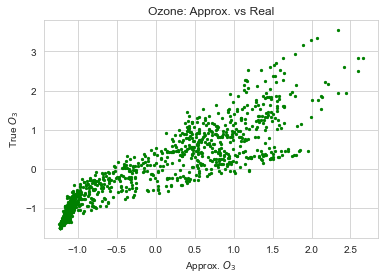

In [11]:
df_scaled = standarize(df, columns = ['ozone', 'target'])
_ = scatter_plot(df_scaled, x='ozone', y='target', label='Scaled', color='green')    

The standarized data has the same shape as stated in the document.

## Exercise 3

Estimated Ozone with respecte to humidity/temperature:

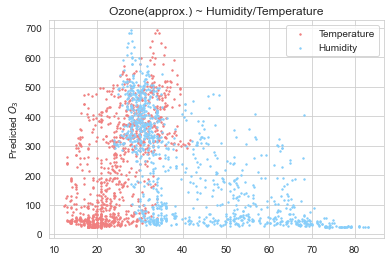

In [12]:
def scatter_plot(df, x, y, label, color, ax=None):
    ax = df.plot(
        x=x, 
        y=y,
        kind='scatter',
        title='Ozone(approx.) ~ Humidity/Temperature',
        color=color,
        xlabel='',
        ylabel='Predicted $O_3$',
        ax=ax,
        label=label,
        legend=True,
        s=2,
    )
    return ax

ax = scatter_plot(df, x='temperature', y='ozone', label='Temperature', color='lightcoral')
_ = scatter_plot(df, ax=ax, x='humidity', y='ozone', label='Humidity', color='lightskyblue')    

Real Ozone with respecte to humidity/temperature:

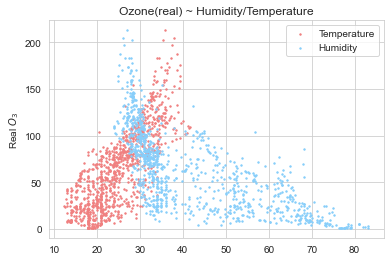

In [13]:
def scatter_plot(df, x, y, label, color, ax=None):
    ax = df.plot(
        x=x, 
        y=y,
        kind='scatter',
        title='Ozone(real) ~ Humidity/Temperature',
        color=color,
        xlabel='',
        ylabel='Real $O_3$',
        ax=ax,
        label=label,
        legend=True,
        s=2,
    )
    return ax

ax = scatter_plot(df, x='temperature', y='target', label='Temperature', color='lightcoral')
_ = scatter_plot(df, ax=ax, x='humidity', y='target', label='Humidity', color='lightskyblue')    